Хи-квадрат: 6.54, p-значение: 0.84
Соответствует Пуассоновскому распределению: Да
Среднее значение λ: 4.98, стандартная ошибка: 0.12


Явный вид формул с текущими значениями λ:
PDF (Плотность вероятности): P(X=k) = (λ^k * e^(-λ)) / k!; λ = 4.98
Пример: для X=3:
P(X=3) = (4.98^3 * e^(-4.98)) / 3! = 0.14130

CDF (Функция распределения): P(X ≤ k) = Σ[λ^i * e^(-λ) / i!], i=0..k; λ = 4.98
P(X ≤ 3) = Σ[(4.98^i * e^(-4.98)) / i!], i=0..3 = 0.26734

Вероятность k транзакций за период t: P(X=k) = ((λt)^k * e^(-λt)) / k!
P(X=3, t=2) = ((4.98 * 2)^3 * e^(-(4.98 * 2))) / 3! = 0.00774


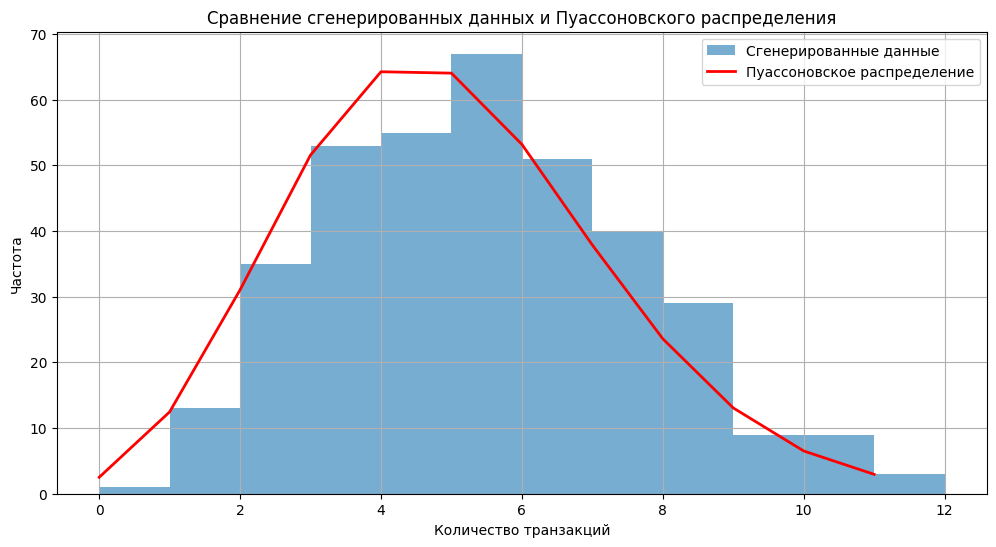

In [24]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. Генерация случайных данных
np.random.seed(42)
data = np.random.poisson(lam=5, size=365)

# 2. Оценка параметра λ (среднего числа событий) с учетом неопределенности
mu = data.mean()  # Среднее значение
sigma = data.std() / np.sqrt(len(data))  # Стандартная ошибка среднего

# 3. Симуляция λ с нормальным распределением для учета погрешности
simulated_lambdas = np.random.normal(loc=mu, scale=sigma, size=10000)

# 4. Вычисление теоретического количества наблюдений с учетом погрешности
observed, bins = np.histogram(data, bins=range(data.min(), data.max() + 2))
expected = np.zeros_like(observed, dtype=float)

for i, k in enumerate(range(data.min(), data.max() + 1)):
    expected[i] = len(data) * np.mean([stats.poisson.pmf(k, lam) for lam in simulated_lambdas])

# Корректировка ожидаемых значений для совпадения с суммой наблюдаемых значений
expected = expected * (observed.sum() / expected.sum())

# 5. Проверка хи-квадратом
chi2, p = stats.chisquare(observed, expected)

# 6. Решение и визуализация
result = "Да" if p > 0.05 else "Нет"

print(f'Хи-квадрат: {chi2:.2f}, p-значение: {p:.2f}')
print(f'Соответствует Пуассоновскому распределению: {result}')
print(f'Среднее значение λ: {mu:.2f}, стандартная ошибка: {sigma:.2f}')
print()
# Формулы с реальными числами
print("\nЯвный вид формул с текущими значениями λ:")
print(f"PDF (Плотность вероятности): P(X=k) = (λ^k * e^(-λ)) / k!; λ = {mu:.2f}")
print("Пример: для X=3:")
pdf_example = (mu**3 * np.exp(-mu)) / math.factorial(3)
print(f"P(X=3) = ({mu:.2f}^3 * e^(-{mu:.2f})) / 3! = {pdf_example:.5f}")
print()
print(f"CDF (Функция распределения): P(X ≤ k) = Σ[λ^i * e^(-λ) / i!], i=0..k; λ = {mu:.2f}")
cdf_example = sum([(mu**i * np.exp(-mu)) / math.factorial(i) for i in range(4)])
print(f"P(X ≤ 3) = Σ[({mu:.2f}^i * e^(-{mu:.2f})) / i!], i=0..3 = {cdf_example:.5f}")
print()
print(f"Вероятность k транзакций за период t: P(X=k) = ((λt)^k * e^(-λt)) / k!")
t = 2  # Пример для периода 2
k = 3
poisson_period = ((mu * t)**k * np.exp(-(mu * t))) / math.factorial(k)
print(f"P(X=3, t=2) = (({mu:.2f} * {t})^3 * e^(-({mu:.2f} * {t}))) / 3! = {poisson_period:.5f}")

# Построение графиков
plt.figure(figsize=(12, 6))

# Гистограмма сгенерированных данных
plt.hist(data, bins=range(data.min(), data.max() + 2), alpha=0.6, label='Сгенерированные данные')

# График теоретического распределения Пуассона
x = np.arange(data.min(), data.max() + 1)
expected_poisson = len(data) * stats.poisson.pmf(x, mu)
plt.plot(x, expected_poisson, 'r-', label='Пуассоновское распределение', linewidth=2)

# Подписи и легенда
plt.xlabel('Количество транзакций')
plt.ylabel('Частота')
plt.title('Сравнение сгенерированных данных и Пуассоновского распределения')
plt.legend()
plt.grid()
plt.show()


In [19]:
import ipywidgets as widgets
from IPython.display import display
import math
import numpy as np


# Input widgets with adjusted layout and style
t = widgets.FloatText(
    description="Введите длину периода (t): ",
    layout=widgets.Layout(width='300px'),
    style={'description_width': 'initial'}  # Устанавливаем ширину описания
)

k = widgets.IntText(
    description="Введите количество событий (k): ",
    layout=widgets.Layout(width='300px'),
    style={'description_width': 'initial'}  # Устанавливаем ширину описания
)
# Output widget
output = widgets.Output()

# Function to perform the calculations
def perform_calculations(t_value, k_value):
    mu = 1.0

    pdf_example = (mu**k_value * np.exp(-mu)) / math.factorial(k_value)
    cdf_example = sum([(mu**i * np.exp(-mu)) / math.factorial(i) for i in range(k_value + 1)])
    poisson_period = ((mu * t_value)**k_value * np.exp(-(mu * t_value))) / math.factorial(k_value)
    poisson_period_cdf = sum(((mu * t_value)**i * np.exp(-(mu * t_value))) / math.factorial(i) for i in range(k_value + 1))

    with output:
        output.clear_output(wait=True)
        results = f"""
        PDF (P(X={k_value}) за единицу времени): {pdf_example:.6f}
        CDF (P(X≤{k_value}) за единицу времени): {cdf_example:.6f}
        P(X={k_value}) за период длиной t={t_value}: {poisson_period:.20f}
        P(X≤{k_value}) за период длиной t={t_value}: {poisson_period_cdf:.20f}
        """
        print(results)
        return results

# Function to get valid input
def get_input(b):
    global t_value, k_value
    
    try:
        t_value = float(t.value)
        k_value = int(k.value)
        
        if t_value > 0 and k_value >= 0:
            results = perform_calculations(t_value, k_value)
        else:
            with output:
                output.clear_output(wait=True)
                print("Значения должны быть больше нуля для t и неотрицательными для k.")
    except ValueError:
        with output:
            output.clear_output(wait=True)
            print("Пожалуйста, введите корректные числа.")

# Button to confirm input
confirm_button = widgets.Button(description="OK")
confirm_button.on_click(get_input)

# Display the widgets
display(t, k, confirm_button, output)


FloatText(value=0.0, description='Введите длину периода (t): ', layout=Layout(width='300px'), style=Descriptio…

IntText(value=0, description='Введите количество событий (k): ', layout=Layout(width='300px'), style=Descripti…

Button(description='OK', style=ButtonStyle())

Output()